In [97]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from IPython.core.pylabtools import figsize
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import MinMaxScaler


from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB , MultinomialNB
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import precision_score,accuracy_score,confusion_matrix,f1_score,recall_score

# TRAIN DATA SET

# Get Data

In [2]:
df = pd.read_csv('HR_data.csv')

In [3]:
pd.set_option('display.max_columns', None)  # to display all the columns
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# Data quality

Check for:
1) Missing Data

2) Data Types of variables and their values

3) Data columns

In [4]:
# check the data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     12000 non-null  float64
 1   last_evaluation        12000 non-null  float64
 2   number_project         12000 non-null  int64  
 3   average_montly_hours   12000 non-null  int64  
 4   time_spend_company     12000 non-null  int64  
 5   Work_accident          12000 non-null  int64  
 6   left                   12000 non-null  int64  
 7   promotion_last_5years  12000 non-null  int64  
 8   sales                  12000 non-null  object 
 9   salary                 12000 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 937.6+ KB


In [5]:
# check shape of the dataset before dealing with missing values
df.shape

(12000, 10)

In [6]:
## Check for null values:

df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

*** There are no missing values ***

## Make changes to columns

In [7]:
# check column names
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [8]:
# check unique values of columns.. do this for all columns
df.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

In [9]:
# change the feature name 'sales' to 'dept', and 'left' to 'turnover'
df = df.rename(columns={'sales':'dept'})
df = df.rename(columns={'left':'turnover'})
df


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,turnover,promotion_last_5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,management,high
11996,0.74,0.95,5,266,10,0,0,1,management,high
11997,0.85,0.54,3,185,10,0,0,1,management,high
11998,0.33,0.65,3,172,10,0,0,1,marketing,high


In [10]:
# Create a new column with satisfaction ranges - 'Low', 'Medium', 'High'

# This will help us analyze the effect of different groups of satisfaction levels for turnover/ current employees 


df['satisfaction_range'] = pd.cut(x=df['satisfaction_level'], bins=[0.0, 0.3, 0.6, 1.0],
                     labels=['Low', 'Medium', 'High'])

# Check the number of values in each bin
print("Satisfaction Range values: ")
print(df['satisfaction_range'].value_counts())


Satisfaction Range values: 
High      6941
Medium    3655
Low       1404
Name: satisfaction_range, dtype: int64


In [11]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,turnover,promotion_last_5years,dept,salary,satisfaction_range
0,0.38,0.53,2,157,3,0,1,0,sales,low,Medium
1,0.80,0.86,5,262,6,0,1,0,sales,medium,High
2,0.11,0.88,7,272,4,0,1,0,sales,medium,Low
3,0.72,0.87,5,223,5,0,1,0,sales,low,High
4,0.37,0.52,2,159,3,0,1,0,sales,low,Medium


# Handle skewness

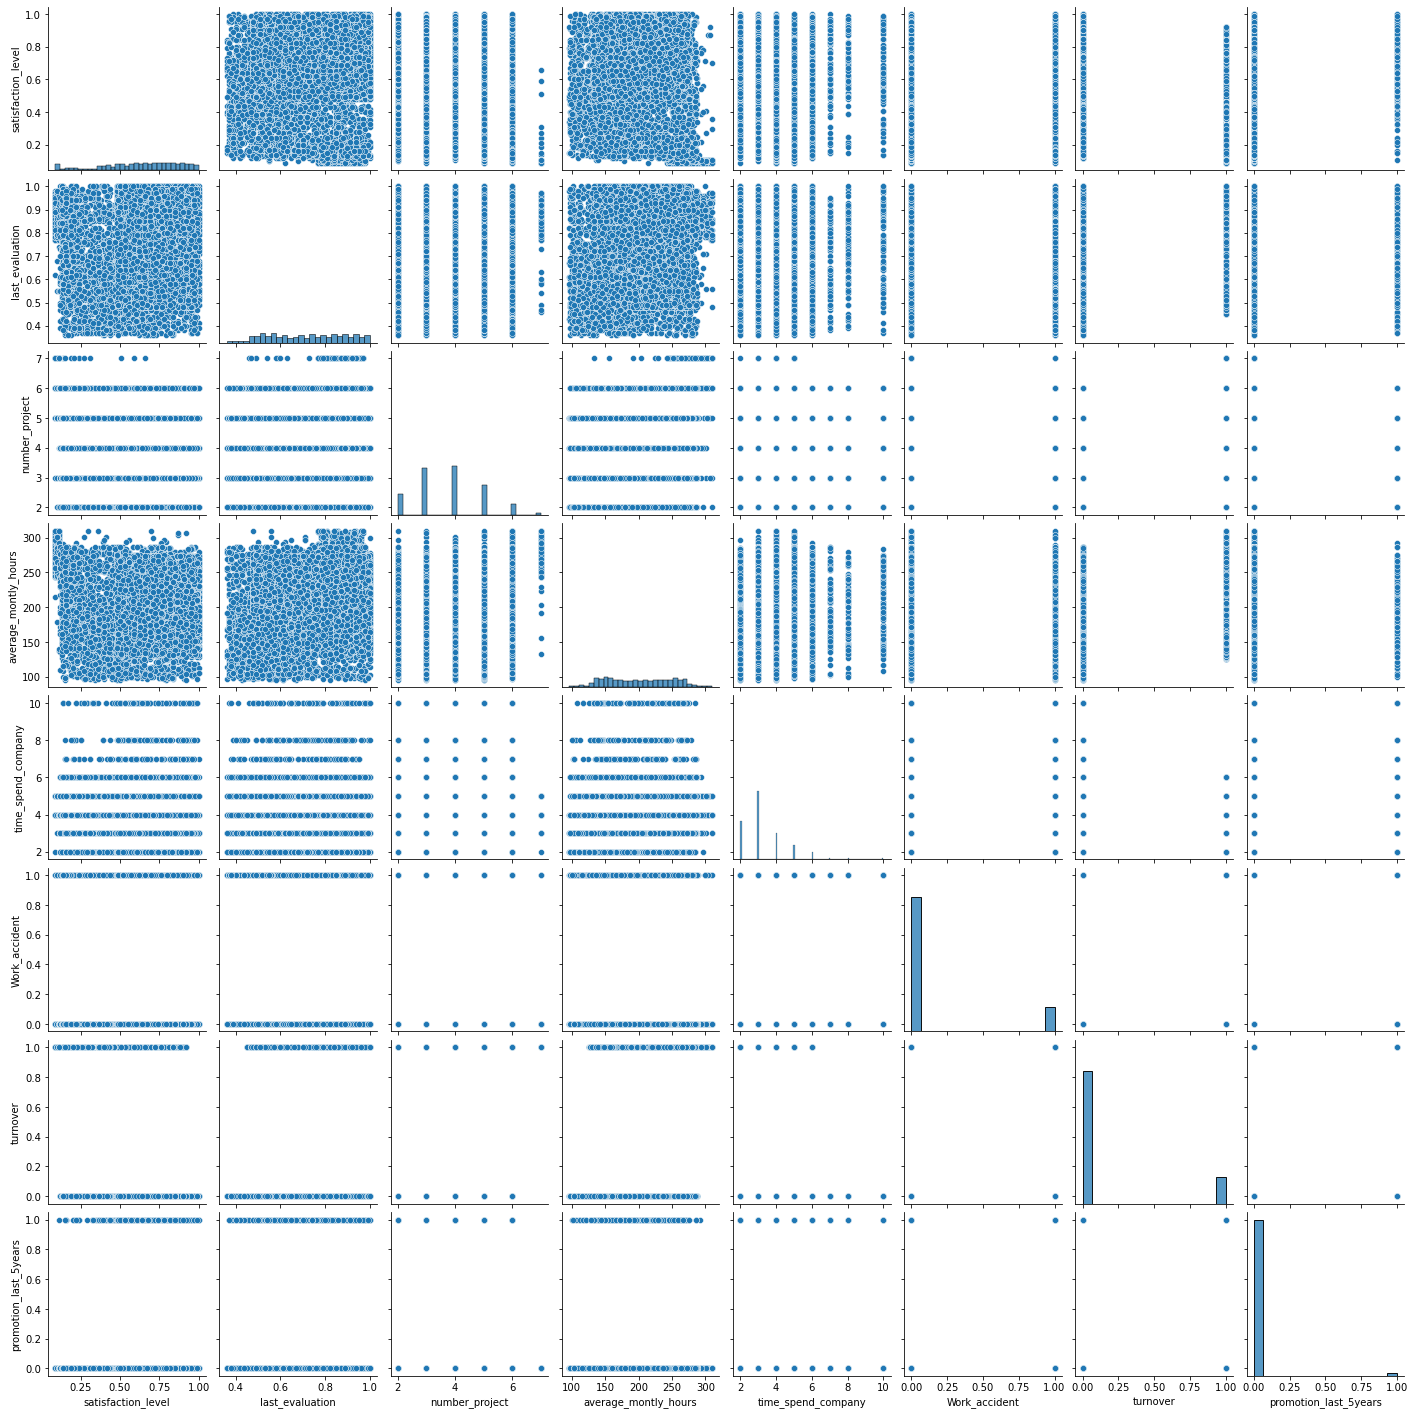

In [12]:
sns.pairplot(df)

*** There are no skewed distributions ***

# Statistical Analysis - Univariate




## Numerical Summary


In [13]:
df.describe(include='all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,turnover,promotion_last_5years,dept,salary,satisfaction_range
count,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000,12000,12000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low,High
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3245,5748,6941
mean,0.629463,0.716558,3.801833,200.437917,3.364667,0.154167,0.166667,0.016917,NaN,NaN,NaN
std,0.241100,0.168368,1.163906,48.740178,1.329787,0.361123,0.372694,0.128965,NaN,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,0.660000,0.720000,4.000000,199.500000,3.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN


### Checking Outliers

In [14]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
satisfaction_level,12000.0,0.629463,0.241100,0.09,0.48,0.66,0.82,1.0
last_evaluation,12000.0,0.716558,0.168368,0.36,0.57,0.72,0.86,1.0
number_project,12000.0,3.801833,1.163906,2.00,3.00,4.00,5.00,7.0
average_montly_hours,12000.0,200.437917,48.740178,96.00,157.00,199.50,243.00,310.0
time_spend_company,12000.0,3.364667,1.329787,2.00,3.00,3.00,4.00,10.0
Work_accident,12000.0,0.154167,0.361123,0.00,0.00,0.00,0.00,1.0
turnover,12000.0,0.166667,0.372694,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,12000.0,0.016917,0.128965,0.00,0.00,0.00,0.00,1.0


*** Columns whose MAX or MIN value is very different from the MEAN value - have outliers. ***

*** For example, in 'time_spend_company', the MAX value is 10.0 while its mean is 3.36. ***

*** The mean is sensitive to outliers, but the fact the mean is so small compared to the max value indicates the max value is an outlier. ***

In [15]:
## 1st Find columns that have potential outliers

outliers = (df.select_dtypes(['float' , 'int'])
 .apply(lambda x: (x >  plt.boxplot(x)['whiskers'][1].get_ydata()[1] ) 
        | (x <  plt.boxplot(x)['whiskers'][0].get_ydata()[1] ) ))
plt.close()

(outliers).mean()*100

satisfaction_level        0.000000
last_evaluation           0.000000
number_project            0.000000
average_montly_hours      0.000000
time_spend_company        6.866667
Work_accident            15.416667
turnover                 16.666667
promotion_last_5years     1.691667
dtype: float64

*** Columns with non-zero values have outliers.  ***

*** 'Work_accident', 'turnover', 'promotion_last_5years' are categorical columns. So we'll ignore them. *** 

*** Now we need to handle 'time_spend_company' column's outliers.*** 

<AxesSubplot:xlabel='time_spend_company'>

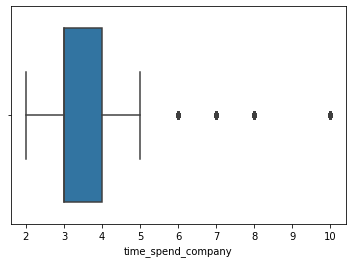

In [16]:
## 2nd - Plot the column to visualize outliers
# Box-plot

sns.boxplot(x=df['time_spend_company'])


*** Although we have some extreme values in 'time_spend_company', but they simply reflect that few employees worked for long years (6 to 10 years) in the company. Since this information is valuable, we will not delete these rows. ***

*** Also, replacing them with mean, median or mode values does not make logical sense, so the outlying rows will remain unchanged. ***

## Graphical Summary

### Categorical features

In [17]:
# check count of each value in the 'turnover' column
attritioncount = df["turnover"].value_counts()
attritioncount

0    10000
1     2000
Name: turnover, dtype: int64

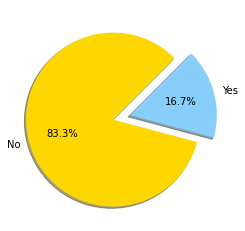

In [18]:
# Pie chart for 'turnover' column

labels=['No','Yes']
colors=['gold','lightskyblue']
explode=(0.2,0)

plt.pie(attritioncount,explode=explode,labels=labels,colors=colors,
        autopct='%1.1f%%',shadow=True,startangle=45)
plt.show()

In [19]:
# check count of each value in the 'Work_accident' column
accidentcount = df["Work_accident"].value_counts()
accidentcount

0    10150
1     1850
Name: Work_accident, dtype: int64

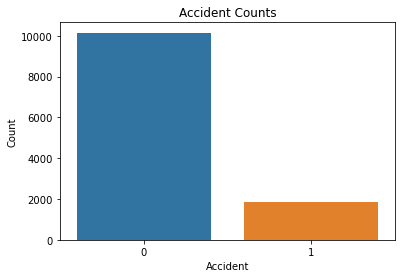

In [20]:
# Create Bar-plot on 'Work_accident' column
x_value = accidentcount.index 
y_value = accidentcount.values 

ax = sns.barplot(x = x_value, y = y_value, 
              data = df)
ax.set(xlabel='Accident', ylabel='Count', title='Accident Counts')
plt.show()

*** 1850 employees met with an accident in 1 year. Regardless of whether this affects attrition, more safety measures need to be put in place to bring down this number.  ***

0    11797
1      203
Name: promotion_last_5years, dtype: int64
----- Percent Values -----
0    98.308333
1     1.691667
Name: promotion_last_5years, dtype: float64


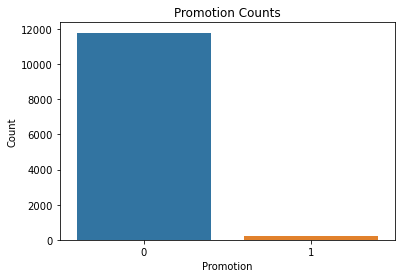

In [21]:
# check count and percent value of each value in the 'promotion_last_5years' column

promotioncount = df["promotion_last_5years"].value_counts()
print(promotioncount)

percent_values = df["promotion_last_5years"].value_counts(normalize=True) * 100
print('----- Percent Values -----')
print(percent_values)

# Create Bar-plot on 'promotion_last_5years' column
x_value = promotioncount.index 
y_value = promotioncount.values 

ax = sns.barplot(x = x_value, y = y_value, 
              data = df)
ax.set(xlabel='Promotion', ylabel='Count', title='Promotion Counts')
plt.show()

*** In the first look we see that less than 2% of the employees received promotion in the last 5 years. But before concluding anything, it should be noted that this feature describes promotion received in the last 5 years - 'Yes/ No'. ***

*** It includes data for all those employees have joined recently (less than 5 years ago), which does not reflect the true value of this feature. For instance, if an employee joined 2 years ago and falls under the 'No' category, it does not mean they did not receive promotion in 5 years. This leads to disparity in the values for this feature. ***

*** As a result, this feature should be analyzed only for those employees who have been a part of the company for 5 years or more. ***

Count of employees > 5 years: 
1886
 
----- Count with respect to attrition -----
0    1833
1      53
Name: promotion_last_5years, dtype: int64
 
----- Percent Values -----
0    97.18982
1     2.81018
Name: promotion_last_5years, dtype: float64
 


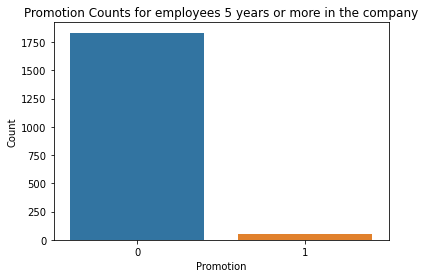

In [22]:
## Plot for employees who have spent 5 years or more in the company


# Create a dataframe for these employees
df_emp5 = df.query("time_spend_company >= 5")

# Count of employees who have spent 5 years or more 
empCount_5yrs = df_emp5.shape[0]
print('Count of employees > 5 years: ')
print(empCount_5yrs)
print(' ')

promotioncount_emp5yrs = df_emp5["promotion_last_5years"].value_counts()
print('----- Count with respect to attrition -----')
print(promotioncount_emp5yrs)
print(' ')

percent_values_emp5 = df_emp5["promotion_last_5years"].value_counts(normalize=True) * 100
print('----- Percent Values -----')
print(percent_values_emp5)
print(' ')

# Create Bar-plot on 'promotion_last_5years' column
x_value = promotioncount_emp5yrs.index 
y_value = promotioncount_emp5yrs.values 

ax = sns.barplot(x = x_value, y = y_value, 
              data = df)
ax.set(xlabel='Promotion', ylabel='Count', title='Promotion Counts for employees 5 years or more in the company')
plt.show()

*** Less than 3% of eligible employees received promotion in the last 5 years. ***

low       5748
medium    5262
high       990
Name: salary, dtype: int64
----- Percent Values -----
low       47.90
medium    43.85
high       8.25
Name: salary, dtype: float64


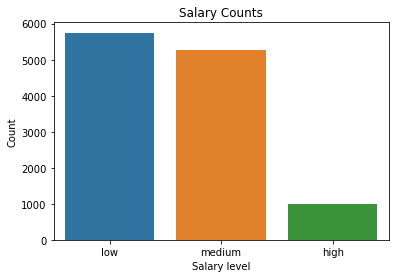

In [23]:
# check count and percent of each value in the 'salary' column

salarycount = df["salary"].value_counts()
print(salarycount)

percent_values_sal = df["salary"].value_counts(normalize=True) * 100
print('----- Percent Values -----')
print(percent_values_sal)


# Create Bar-plot on 'salary' column
x_value = salarycount.index 
y_value = salarycount.values 

ax = sns.barplot(x = x_value, y = y_value, 
              data = df)
ax.set(xlabel='Salary level', ylabel='Count', title='Salary Counts')
plt.show()

High      6941
Medium    3655
Low       1404
Name: satisfaction_range, dtype: int64
----- Percent Values -----
High      57.841667
Medium    30.458333
Low       11.700000
Name: satisfaction_range, dtype: float64


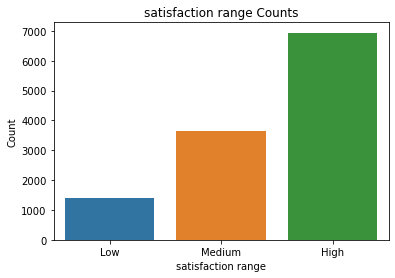

In [24]:
# check percentage of each value in the 'satisfaction_range' column

satifactioncount = df["satisfaction_range"].value_counts()
print(satifactioncount)

percent_values_sat = df["satisfaction_range"].value_counts(normalize=True) * 100
print('----- Percent Values -----')
print(percent_values_sat)


# Create Bar-plot on 'dept' column
x_value = satifactioncount.index 
y_value = satifactioncount.values 

ax = sns.barplot(x = x_value, y = y_value, 
              data = df)
ax.set(xlabel='satisfaction range', ylabel='Count', title='satisfaction range Counts')

plt.show()

sales          3245
technical      2244
support        1821
IT              977
RandD           695
product_mng     686
marketing       673
accounting      622
hr              601
management      436
Name: dept, dtype: int64


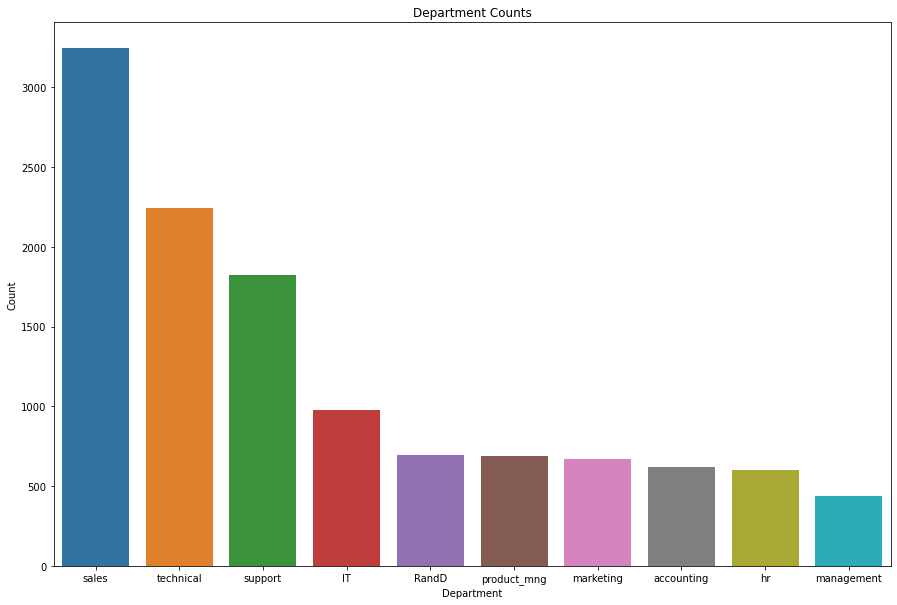

In [25]:
# check count of each value in the 'dept' column
salescount = df["dept"].value_counts()
print(salescount)

# Create Bar-plot on 'dept' column
plt.figure(figsize=(15,10))

x_value = salescount.index 
y_value = salescount.values 

ax = sns.barplot(x = x_value, y = y_value, 
              data = df)
ax.set(xlabel='Department', ylabel='Count', title='Department Counts')

plt.show()

*** The Sales department has the largest number of employees, followed by the Technical and Support departments, 
totaling about 7300 employees. ***

*** Management is the smallest of them with only 430 employees. ***

### Numerical Features

Create histogram for Numerical features


----- Percent Values -----
satisfaction > 0.7: 5235
satisfaction 0.5 to 0.7: 3372
satisfaction < 0.5: 3393


Text(0.5, 1.0, 'satisfaction level of employees')

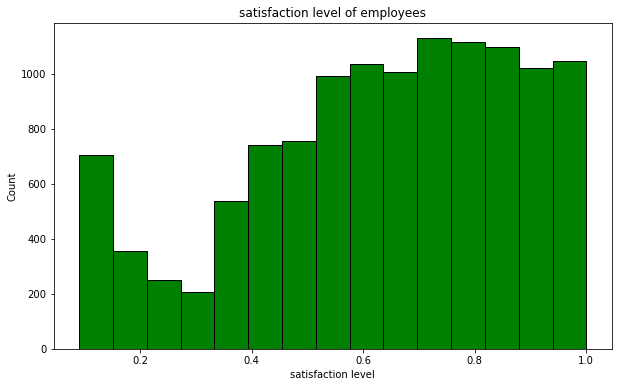

In [26]:
# Create histogram on satisfaction_level column

high_satisfaction = len(df[(df['satisfaction_level']> 0.7)])
med_satisfaction = len(df[(df['satisfaction_level']> 0.5) & (df['satisfaction_level']<=0.7)])
low_satisfaction = len(df[(df['satisfaction_level']<= 0.5)])

print('----- Percent Values -----')
print('satisfaction > 0.7: '+ str(high_satisfaction))
print('satisfaction 0.5 to 0.7: '+ str(med_satisfaction))
print('satisfaction < 0.5: '+ str(low_satisfaction))

figsize(10, 6) 
plt.hist(df['satisfaction_level'], color='green', edgecolor='black', bins=int(45/3))
 
plt.xlabel('satisfaction level')
plt.ylabel('Count')
plt.title('satisfaction level of employees')

*** Majority of the employees are satisfied with their work, with about 43% of employees highly satisfied (> 0.7 rating). ***

*** At the other end of the spectrum, we have approximately 3400 employees (28%) with a low satisfaction level of below 0.5. ***

----- Percent Values -----
> 0.7 rating: 53.574999999999996
< 0.4 rating: 1.2666666666666666


Text(0.5, 1.0, 'Last Evaluation rating counts')

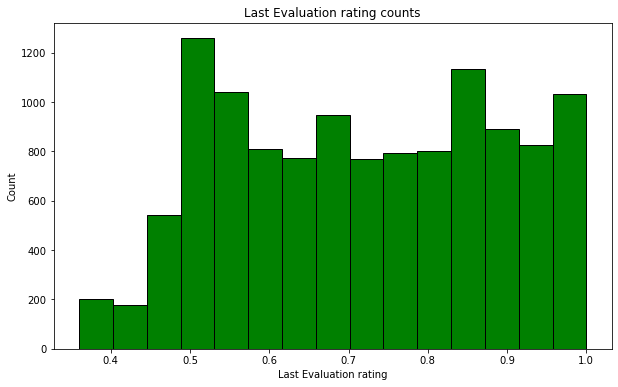

In [27]:
# Create histogram on last_evaluation column

high_rating = df['last_evaluation'].ge(0.7).mean()*100
low_rating = df['last_evaluation'].lt(0.4).mean()*100
print('----- Percent Values -----')
print('> 0.7 rating: '+ str(high_rating))
print('< 0.4 rating: '+ str(low_rating))

figsize(10, 6) 
plt.hist(df['last_evaluation'], color='green', edgecolor='black', bins=int(45/3))
 
plt.xlabel('Last Evaluation rating')
plt.ylabel('Count')
plt.title('Last Evaluation rating counts')


*** About 54% of the employees got good ratings (> 0.7). ***

*** Only about 1% of the employees got low ratings (< 0.4). ***

*** So majority of employees fall under the category of medium to high ratings. ***


Text(0.5, 1.0, 'number of projects employee worked on')

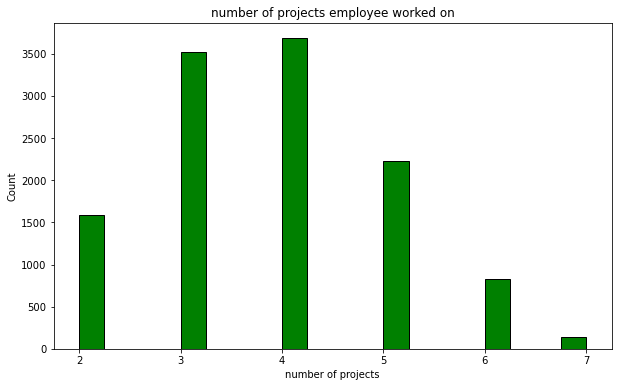

In [28]:
# Create histogram on number_project column
figsize(10, 6) 
plt.hist(df['number_project'], color='green', edgecolor='black', bins=int(20))
 
plt.xlabel('number of projects')
plt.ylabel('Count')
plt.title('number of projects employee worked on')


*** Majority of employees worked in 3-5 projects. ***

Text(0.5, 1.0, 'Average monthly hours employee worked')

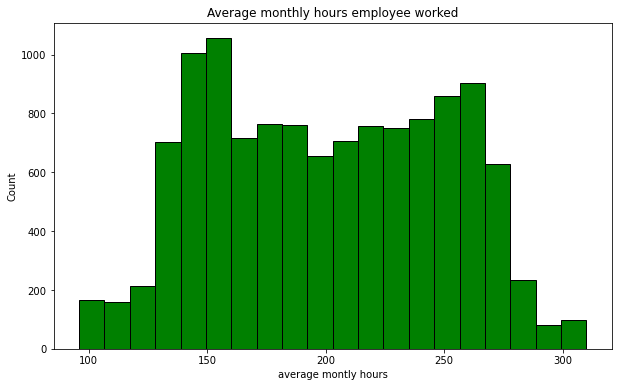

In [29]:
# Create histogram on average_montly_hours column
figsize(10, 6) 
plt.hist(df['average_montly_hours'], color='green', edgecolor='black', bins=int(20))
 
plt.xlabel('average montly hours')
plt.ylabel('Count')
plt.title('Average monthly hours employee worked')

*** 'Average monthly hours' is a bi-modal distribution, peaking at around 150 hours and 260 hours ***

Text(0.5, 1.0, 'time spent in the company')

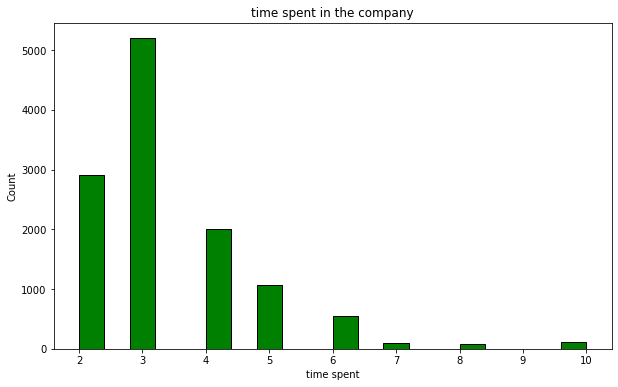

In [30]:
# Create histogram on time_spend_company column

figsize(10, 6) 
plt.hist(df['time_spend_company'], color='green', edgecolor='black', bins=int(20))
 
plt.xlabel('time spent')
plt.ylabel('Count')
plt.title('time spent in the company')

*** A right-skewed distribution tells us that fewer employees stay at the company as number of years increases *** 

# Relation between variables

Check how each independent variable behaves with respect to the dependent variable 'turnover'

## Relation between Categorical and Discrete independent variables and 'turnover'

Work_accident     0     1
turnover                 
0              8255  1745
1              1895   105


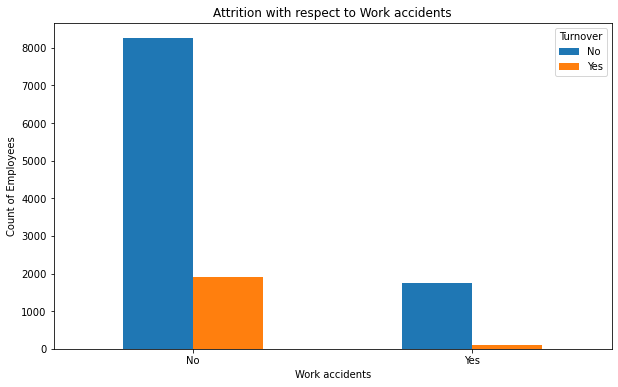

In [31]:
# Breakdown of Attribution data with respect to Work_accident

# Creating crosstab
print(pd.crosstab(df['turnover'], df['Work_accident']))
 
# Creating barplot
ax = pd.crosstab(df['Work_accident'],df['turnover']).plot(kind='bar', rot=0)
ax.set_xticklabels(labels=['No', 'Yes'])
ax.legend(["No", "Yes"], title='Turnover')

plt.title('Attrition with respect to Work accidents')
plt.xlabel('Work accidents')
plt.ylabel('Count of Employees')
plt.show()

*** Out of all the employees who left, only 5% of them met with an accident at work ***

promotion_last_5years     0   1
turnover                       
0                      1243  52
1                       590   1


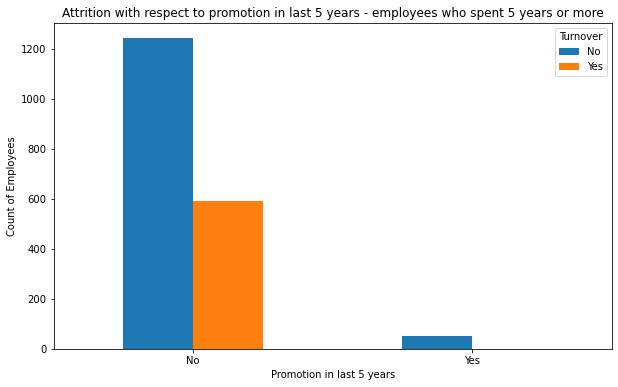

In [32]:
## Plot for employees who have spent 5 years or more in the company

# Creating crosstab
print(pd.crosstab(df_emp5['turnover'], df_emp5['promotion_last_5years']))
 
# Creating barplot
ax = pd.crosstab(df_emp5['promotion_last_5years'],df_emp5['turnover']).plot(kind='bar', rot=0)
ax.set_xticklabels(labels=['No', 'Yes'])
ax.legend(["No", "Yes"], title='Turnover')

plt.title('Attrition with respect to promotion in last 5 years - employees who spent 5 years or more')
plt.xlabel('Promotion in last 5 years')
plt.ylabel('Count of Employees')
plt.show()

*** Out of 591 employees who left, 590 of them did not receive a promotion. It's a big factor for employees leaving the company.  ***

satisfaction_range  Low  Medium  High
turnover                             
0                   867    2742  6391
1                   537     913   550


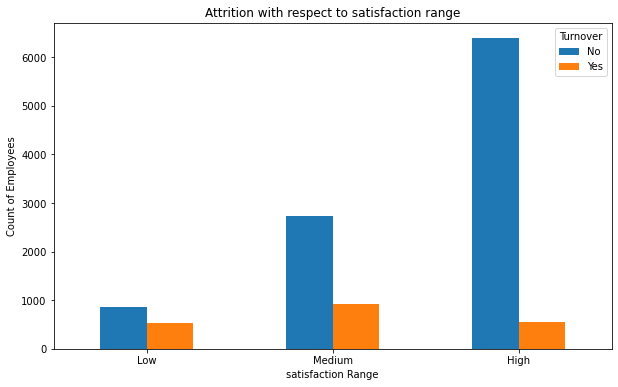

In [33]:
# Breakdown of Attribution data with respect to satisfaction_range

# Creating crosstab
print(pd.crosstab(df['turnover'], df['satisfaction_range']))
 
# Creating barplot
ax = pd.crosstab(df['satisfaction_range'],df['turnover']).plot(kind='bar', rot=0)
ax.legend(["No", "Yes"], title='Turnover')

plt.title('Attrition with respect to satisfaction range')
plt.xlabel('satisfaction Range')
plt.ylabel('Count of Employees')
plt.show()

*** When analyzing the correlation between 'turnover' and 'satisfaction_range' there does not seem to be a strong correlation, as there have been attrition in every group (low, medium, high). But satisfaction being such an important factor, we must investigate it further by using the following method: ***

- Use satisfaction_level instead of satisfaction_range to see if we find similar or different trends, as grouping of variables may result in masking the actual values.

### Plot for 'turnover' vs 'satisfaction_level'

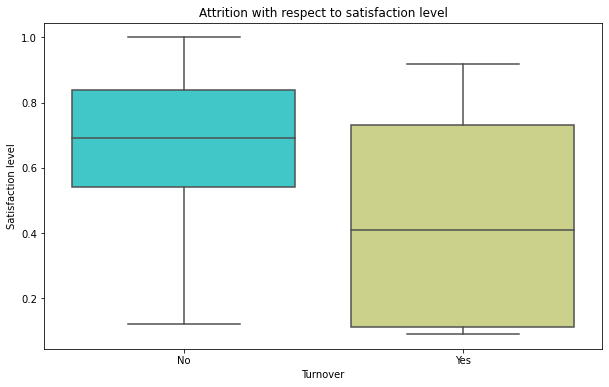

In [34]:
# Attrition with respect to satisfaction level

ax = sns.boxplot(x='turnover', y='satisfaction_level', data=df, palette='rainbow')
ax.set_xticklabels(labels=['No', 'Yes'])

plt.title('Attrition with respect to satisfaction level')
plt.xlabel('Turnover')
plt.ylabel('Satisfaction level')
plt.show()

#model = ols( '{} ~ C(turnover)'.format(satisfaction_level), data=df).fit()
#print(sm.stats.anova_lm(model, typ=2))

*** There is very little overlapping of data for turnover/ non-turnover employees. this indicates a clear correlation between these two variables. ***

dept       IT  RandD  accounting   hr  management  marketing  product_mng  \
turnover                                                                    
0         818    609         512  488         384        561          576   
1         159     86         110  113          52        112          110   

dept      sales  support  technical  
turnover                             
0          2689     1509       1854  
1           556      312        390  


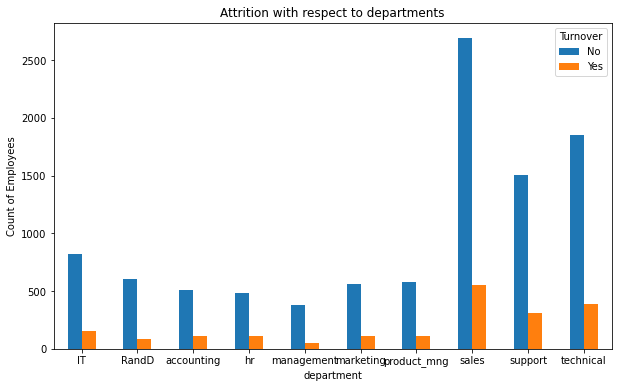

In [35]:
# Breakdown of Attribution data with respect to dept

# Creating crosstab
print(pd.crosstab(df['turnover'], df['dept']))
 
# Creating barplot
ax = pd.crosstab(df['dept'],df['turnover']).plot(kind='bar', rot=0)
#ax.set_xticklabels(labels=['No', 'Yes'])
ax.legend(["No", "Yes"], title='Turnover')

plt.title('Attrition with respect to departments')
plt.xlabel('department')
plt.ylabel('Count of Employees')
plt.show()

salary    high   low  medium
turnover                    
0          942  4566    4492
1           48  1182     770


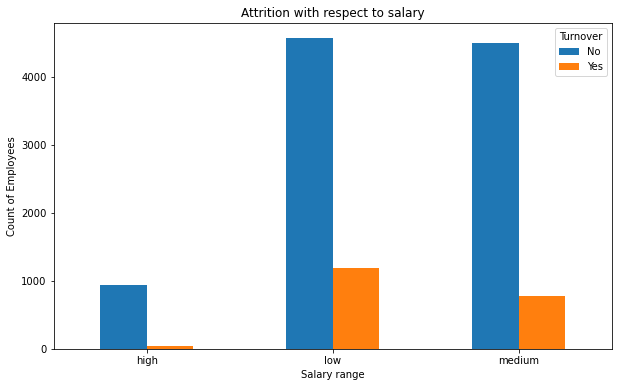

In [36]:
# Breakdown of Attribution data with respect to salary

# Creating crosstab
print(pd.crosstab(df['turnover'], df['salary']))
 
# Creating barplot
ax = pd.crosstab(df['salary'],df['turnover']).plot(kind='bar', rot=0)
#ax.set_xticklabels(labels=['No', 'Yes'])
ax.legend(["No", "Yes"], title='Turnover')

plt.title('Attrition with respect to salary')
plt.xlabel('Salary range')
plt.ylabel('Count of Employees')
plt.show()

number_project    2     3     4     5    6    7
turnover                                       
0               725  3482  3448  1890  455    0
1               865    38   237   343  372  145


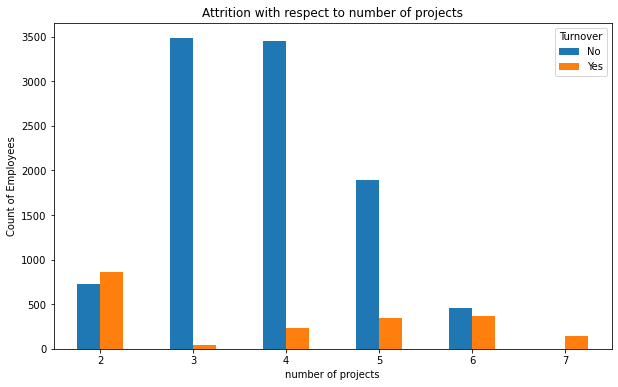

In [37]:
# Breakdown of Attribution data with respect to number of projects

# Creating crosstab
print(pd.crosstab(df['turnover'], df['number_project']))
 
# Creating barplot
ax = pd.crosstab(df['number_project'],df['turnover']).plot(kind='bar', rot=0)
#ax.set_xticklabels(labels=['No', 'Yes'])
ax.legend(["No", "Yes"], title='Turnover')

plt.title('Attrition with respect to number of projects')
plt.xlabel('number of projects')
plt.ylabel('Count of Employees')
plt.show()



*** People working in 2 projects have seen the highest attrition. But the trend here is not very straightforward, as attrition count seems to be quite uniformly distributed among employees working on 4,5 and 6 projects. There doesn't seem to be a relation between this variable and turnover. ***

time_spend_company    2     3     4    5    6   7   8    10
turnover                                                   
0                   2879  4316  1510  580  433  94  81  107
1                     31   882   496  482  109   0   0    0


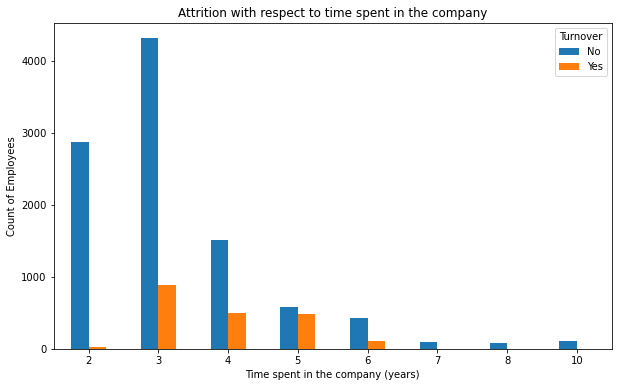

In [38]:
# Breakdown of Attribution data with respect to time spend in the company

# Creating crosstab
print(pd.crosstab(df['turnover'], df['time_spend_company']))
 
# Creating barplot
ax = pd.crosstab(df['time_spend_company'],df['turnover']).plot(kind='bar', rot=0)
ax.legend(["No", "Yes"], title='Turnover')

plt.title('Attrition with respect to time spent in the company')
plt.xlabel('Time spent in the company (years)')
plt.ylabel('Count of Employees')
plt.show()



## Relation between Continuous independent variables and 'turnover'

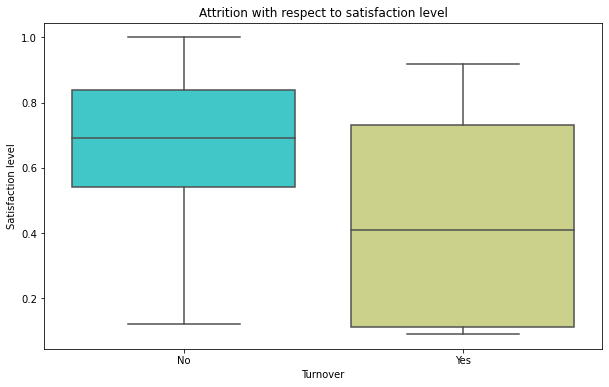

In [39]:
# Attrition with respect to satisfaction level

ax = sns.boxplot(x='turnover', y='satisfaction_level', data=df, palette='rainbow')
ax.set_xticklabels(labels=['No', 'Yes'])

plt.title('Attrition with respect to satisfaction level')
plt.xlabel('Turnover')
plt.ylabel('Satisfaction level')
plt.show()

#model = ols( '{} ~ C(turnover)'.format(satisfaction_level), data=df).fit()
#print(sm.stats.anova_lm(model, typ=2))

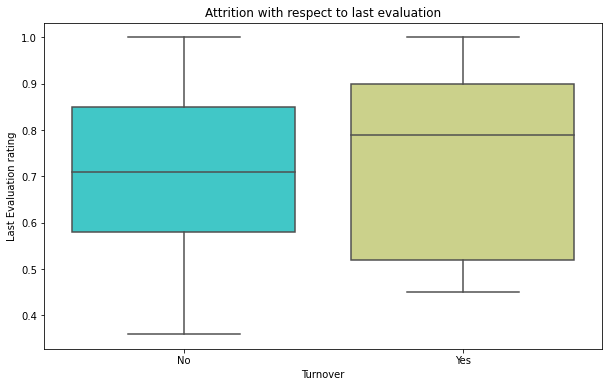

In [40]:
# Attrition with respect to last evaluation

ax = sns.boxplot(x='turnover', y='last_evaluation', data=df, palette='rainbow')
ax.set_xticklabels(labels=['No', 'Yes'])

plt.title('Attrition with respect to last evaluation')
plt.xlabel('Turnover')
plt.ylabel('Last Evaluation rating')
plt.show()

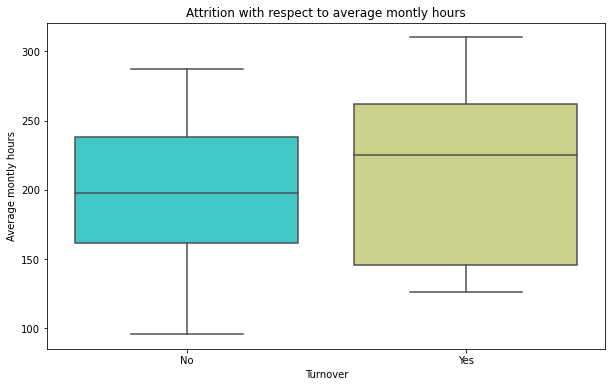

In [41]:
# Attrition with respect to average montly hours

ax = sns.boxplot(x='turnover', y='average_montly_hours', data=df, palette='rainbow')
ax.set_xticklabels(labels=['No', 'Yes'])

plt.title('Attrition with respect to average montly hours')
plt.xlabel('Turnover')
plt.ylabel('Average montly hours')
plt.show()

*** Among all the continuous variables, only 'satisfaction_level' has a large variance between turnover values. There is a strong correlation between satisfaction_level and turnover. ***

# Preparing data for ML model

Following steps will be taken to make data ready:

1. Encoding Categorical variables
2. Split the data into train and test sets
3. Feature Selection
4. Feature Scaling (Normalization)

## Encoding Categorical Variables for ML models

Applying LABEL ENCODING for Ordinal variables, and ONE-HOT ENCODING for Nominal variables.

In [42]:
## One-Hot Encoding: on 'dept' feature

dept = df['dept']
dept = pd.get_dummies(dept, drop_first= True)
dept.head()

,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1,0,0


In [43]:
## Label Encoding: on 'salary' feature

df.replace({"low": 0, "medium": 1, "high": 2}, inplace = True)
df['salary'].unique()

array([0, 1, 2], dtype=int64)

In [44]:
# Concatenate dataframe to include encoded columns --> df + dept

df = pd.concat([df, dept], axis = 1)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,turnover,promotion_last_5years,dept,salary,satisfaction_range,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,sales,0,Medium,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,sales,1,High,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,sales,1,Low,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,sales,0,High,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,sales,0,Medium,0,0,0,0,0,0,1,0,0


In [45]:
# Drop all unnecessary columns

df.drop(["dept","satisfaction_range"], axis = 1, inplace = True)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,turnover,promotion_last_5years,salary,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,1,0,0


In [46]:
df.shape

(12000, 18)

*** After feature engineering, the number of columns have increased from 10 to 18 ***

*** The number of rows remains the same. ***

## Train/ Test Split 

In [47]:
## PREPARE THE DATA FOR ML MODEL
# 1. Split the data into train and test
# 2. separate the independent and dependent features
# 3. shuffle the dataset

x_train, x_test = train_test_split(df, test_size=0.2, random_state=0)

# DEPENDENT features
# get the training label
y_train = x_train["turnover"]

# get the test label
y_test = x_test["turnover"]


# INDEPENDENT features
# remove the label from train and test data
x_train.pop("turnover")
x_test.pop("turnover")

#display top 5
x_test.head()
#you may have noticed that the index, the left most column is already shuffled

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
4954,0.80,0.51,5,196,3,0,0,0,0,0,0,0,0,0,0,0,0
11999,0.50,0.73,4,180,3,0,0,0,0,0,0,0,0,0,0,0,0
11041,0.48,0.49,3,268,3,0,0,0,0,0,1,0,0,0,0,0,0
7532,0.62,0.56,4,267,4,0,0,1,0,0,0,0,0,0,0,1,0
11966,0.92,0.65,3,176,3,0,0,0,0,0,0,0,0,0,0,0,0


In [48]:
y_test.head()

4954     0
11999    0
11041    0
7532     0
11966    0
Name: turnover, dtype: int64

## Feature Selection

Following methods are used for feature selection:

1. SelectKBest (Chi-square) - For CATEGORICAL predictors 
2. SelectKBest (ANOVA) - For NUMERICAL predictors 
3. Heatmap - Multicollinearity

### Univariate Feature selection

In [49]:
# apply SelectKBest class to get feature importance values

# Using 'Chi-square test' for CATEGORICAL features

fs_chi = SelectKBest(score_func=chi2, k='all')
fit = fs_chi.fit(x_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x_train.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

cols = len(x_train.columns)
print(featureScores.nlargest(cols,'Score')) # print all columns in descending order of score


                    Specs       Score
3    average_montly_hours  603.425834
4      time_spend_company  150.719541
5           Work_accident  122.570803
0      satisfaction_level  109.758772
7                  salary   95.990027
6   promotion_last_5years   18.858158
8                   RandD    8.785666
2          number_project    3.700692
11             management    3.600161
10                     hr    3.076661
14                  sales    1.058090
16              technical    0.421627
12              marketing    0.094872
1         last_evaluation    0.086613
13            product_mng    0.072763
15                support    0.028701
9              accounting    0.005034


*** Since Chi-square is used for selecting CATEGORICAL features, we'll ignore the NUMERICAL features from the above list. ***

*** Following CATEGORICAL features have good correlation with the dependent variable 'turnover' ***

1. Work_accident
2. salary
3. promotion_last_5years

In [50]:

# Using ANOVA for NUMERICAL features

# configure to select all features
fs_an = SelectKBest(score_func=f_classif, k='all')

# learn relationship from training data
fit_an = fs_an.fit(x_train, y_train)
dfscores_an = pd.DataFrame(fit_an.scores_)
#dfcolumns = pd.DataFrame(x_train.columns)

# concat two dataframes for better visualization 
featureScores_an = pd.concat([dfcolumns,dfscores_an],axis=1)
featureScores_an.columns = ['Specs','Score']  #naming the dataframe columns

print(featureScores_an.nlargest(cols,'Score')) # print all columns in descending order of score

## If we want to transform the dataset, so that only the best features are selected:
# # transform train input data
# X_train_fs = fs.transform(X_train)
# # transform test input data
# X_test_fs = fs.transform(X_test)


                    Specs        Score
0      satisfaction_level  1357.776516
4      time_spend_company   293.220228
5           Work_accident   146.991314
7                  salary   145.848530
3    average_montly_hours    51.232356
6   promotion_last_5years    19.222374
2          number_project    10.328191
8                   RandD     9.333941
11             management     3.734636
10                     hr     3.243634
1         last_evaluation     2.196806
14                  sales     1.445641
16              technical     0.518912
12              marketing     0.100529
13            product_mng     0.077085
15                support     0.033955
9              accounting     0.005313


*** Since ANOVA is used for selecting NUMERICAL features, we'll ignore the CATEGORICAL features from the above list. ***

*** Following NUMERICAL features have good correlation with the dependent variable 'turnover' ***

1. satisfaction_level
2. time_spend_company
3. average_montly_hours
4. number_project

### Check multicollinearity

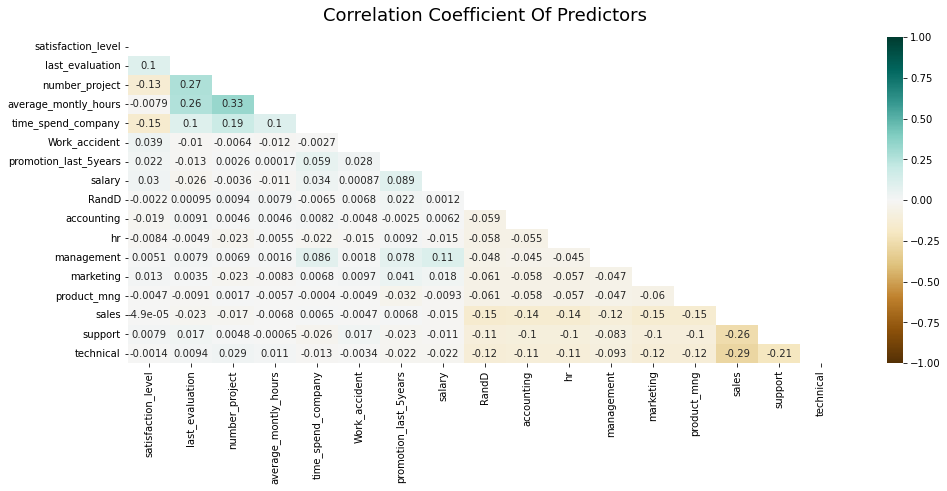

In [53]:
# Create a triangular heat map for independent features

plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(x_train.corr(), dtype= bool))
heatmap = sns.heatmap(x_train.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Coefficient Of Predictors', fontdict={'fontsize':18}, pad=16);

*** No two features are highly correlated. Hence, there is no multicollinearity in our dataset. ***

In [74]:
# Keeping only best features

x_train_imp = x_train[['satisfaction_level', 'time_spend_company', 'average_montly_hours', 'number_project', 'Work_accident',
                      'salary', 'promotion_last_5years']]

x_test_imp = x_test[['satisfaction_level', 'time_spend_company', 'average_montly_hours', 'number_project', 'Work_accident',
                      'salary', 'promotion_last_5years']]



## Normalize train and test data

We'll use the MinMax Scalar method from sklearn.

In [64]:
# define min max scaler
scaler = MinMaxScaler()

# transform data
X_train = scaler.fit_transform(x_train_imp)
X_test = scaler.fit_transform(x_test_imp)

print(X_train)
print(X_test)


[[0.62637363 0.         0.28037383 ... 0.         0.5        0.        ]
 [0.63736264 0.5        0.38317757 ... 0.         0.         0.        ]
 [0.78021978 0.125      0.42523364 ... 1.         0.5        0.        ]
 ...
 [0.65934066 0.         0.76168224 ... 0.         0.5        0.        ]
 [0.75824176 0.125      0.65420561 ... 0.         1.         0.        ]
 [0.51648352 0.         0.5        ... 0.         0.         0.        ]]
[[0.78021978 0.125      0.46728972 ... 0.         0.         0.        ]
 [0.45054945 0.125      0.39252336 ... 0.         0.         0.        ]
 [0.42857143 0.125      0.80373832 ... 0.         0.         0.        ]
 ...
 [0.59340659 0.125      0.3317757  ... 1.         0.5        0.        ]
 [0.73626374 0.25       0.65420561 ... 0.         0.5        0.        ]
 [0.74725275 0.125      0.6682243  ... 1.         0.         0.        ]]


## Machine Learning Algorithms

Following ML algorithms were tested:

1. Logistic Regression
2. Random Forest
3. K-Nearest Neighbour
4. Naive Bayes

### Logistic Regression

In [114]:
logreg_model = LogisticRegression()
logreg_model.fit(X_train,y_train)

y_pred_lr = logreg_model.predict(X_test)


## Calculate metrics

# training accuracy
train_acc_lr = logreg_model.score(X_train, y_train)

# test accuracy
test_acc_lr = logreg_model.score(X_test, y_test)

print('--------- Metrics --------------')
print('Training accuracy:', train_acc_lr)
print('Test accuracy:', test_acc_lr)

print('MAE:', metrics.mean_absolute_error(y_test, y_pred_lr))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_lr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr)))

print('')
print('***** Confusion Matrix *****')
print(confusion_matrix(y_test,y_pred_lr))

--------- Metrics --------------
Training accuracy: 0.8292708333333333
Test accuracy: 0.8366666666666667
MAE: 0.16333333333333333
MSE: 0.16333333333333333
RMSE: 0.40414518843273806

***** Confusion Matrix *****
[[1943   81]
 [ 311   65]]


### Random Forest

In [115]:
rf_model=RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train,y_train)

y_pred_rf = rf_model.predict(X_test)


## Calculate metrics ##

# training accuracy
train_acc_rf = rf_model.score(X_train, y_train)

# test accuracy
test_acc_rf = rf_model.score(X_test, y_test)

print('--------- Metrics --------------')
print('Training accuracy:', train_acc_rf)
print('Test accuracy:', test_acc_rf)

print('MAE:', metrics.mean_absolute_error(y_test, y_pred_rf))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_rf))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)))

print('')
print('***** Confusion Matrix *****')
print(confusion_matrix(y_test,y_pred_rf))

--------- Metrics --------------
Training accuracy: 0.999375
Test accuracy: 0.98625
MAE: 0.01375
MSE: 0.01375
RMSE: 0.11726039399558574

***** Confusion Matrix *****
[[2015    9]
 [  24  352]]


### K-Nearest neighbour

Text(0.5, 1.0, 'Accuracy Scores for Values of k of k-Nearest-Neighbors')

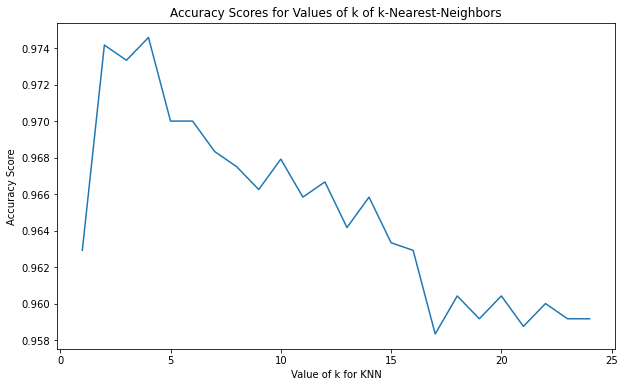

In [102]:
krange=list(range(1,25))
score=[]

for i in krange:
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred_knn = knn.predict(X_test)
    score.append(accuracy_score(y_test,y_pred_knn))
    
plt.plot(krange,score) 

plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')

plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')    
    

In [124]:
knn_model = KNeighborsClassifier(n_neighbors=4)
knn_model.fit(X_train,y_train)
y_pred_knn = knn_model.predict(X_test)


## Calculate metrics ##

# training accuracy
train_acc_knn = knn_model.score(X_train, y_train)

# test accuracy
test_acc_knn = knn_model.score(X_test, y_test)

print('--------- Metrics --------------')
print('Training accuracy:', train_acc_knn)
print('Test accuracy:', test_acc_knn)

print('MAE:', metrics.mean_absolute_error(y_test, y_pred_knn))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_knn))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_knn)))

print('')
print('***** Confusion Matrix *****')
print(confusion_matrix(y_test,y_pred_knn))

--------- Metrics --------------
Training accuracy: 0.975625
Test accuracy: 0.9745833333333334
MAE: 0.025416666666666667
MSE: 0.025416666666666667
RMSE: 0.15942605391424158

***** Confusion Matrix *****
[[1998   26]
 [  35  341]]


### Naive Bayes

In [117]:
GNB_model = GaussianNB()
GNB_model.fit(X_train,y_train)
y_pred_GNB = GNB_model.predict(X_test)

## Calculate metrics ##

# training accuracy
train_acc_GNB = GNB_model.score(X_train, y_train)

# test accuracy
test_acc_GNB = GNB_model.score(X_test, y_test)

print('--------- Metrics --------------')
print('Training accuracy:', train_acc_GNB)
print('Test accuracy:', test_acc_GNB)

print('MAE:', metrics.mean_absolute_error(y_test, y_pred_GNB))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_GNB))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_GNB)))

print('')
print('***** Confusion Matrix *****')
print(confusion_matrix(y_test,y_pred_GNB))

--------- Metrics --------------
Training accuracy: 0.8455208333333334
Test accuracy: 0.8479166666666667
MAE: 0.15208333333333332
MSE: 0.15208333333333332
RMSE: 0.389978631893253

***** Confusion Matrix *****
[[1777  247]
 [ 118  258]]


## Summary of all the models

In [120]:
# List of all models and their accuracy scores
models=["Logistic Regression","Random Forest","KNN","Gaussian Naive Bayes"]
Accuracy_Train = [train_acc_lr,train_acc_rf,train_acc_knn,train_acc_GNB]

Accuracy_Test = [test_acc_lr,test_acc_rf,test_acc_knn,test_acc_GNB]

# display accuracy values in a dataframe
score= pd.DataFrame({"Classification Model" :models,"Training Accuracy":Accuracy_Train,
                     "Test Accuracy":Accuracy_Test})
score.sort_values(by= "Test Accuracy",ascending=False).reset_index(drop=True)

,Classification Model,Training Accuracy,Test Accuracy
0,Random Forest,0.999375,0.986250
1,KNN,0.975625,0.974583
2,Gaussian Naive Bayes,0.845521,0.847917
3,Logistic Regression,0.829271,0.836667


*** The table lists all the models in decreasing order of test accuracy. ***

*** Random Forest gives a very good accuracy (98%). So, we will use this model to predict employees who are likely to leave the company ***

### Using Random Forest to predict number of employees who are likely to leave 

In [153]:
# Get most important features

# feature importance

feat_imp_rf = pd.Series(rf_model.feature_importances_,index=x_train_imp.columns)
print(feat_imp_rf)

satisfaction_level       0.408364
time_spend_company       0.204754
average_montly_hours     0.191950
number_project           0.171749
Work_accident            0.009183
salary                   0.012481
promotion_last_5years    0.001520
dtype: float64


In [152]:
# Number of employees predicted to leave

y_pred_leave_cnt = len(y_pred_rf[y_pred_rf == 1])

print(y_pred_leave_cnt, ' out of ', len(y_test) , ' employees are predicted to leave the company.')

361  out of  2400  employees are predicted to leave the company.
